In [56]:
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,10,10)

In [58]:
tesla = web.DataReader ("TSLA", 'yahoo',start,end)
ford  = web.DataReader ("F", 'yahoo',start,end)
gm    = web.DataReader ("GM", 'yahoo',start,end)

In [59]:
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('Gm_Stock.csv')

In [60]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,28.086000,26.805332,27.000000,27.888666,154285500.0,27.888666
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666


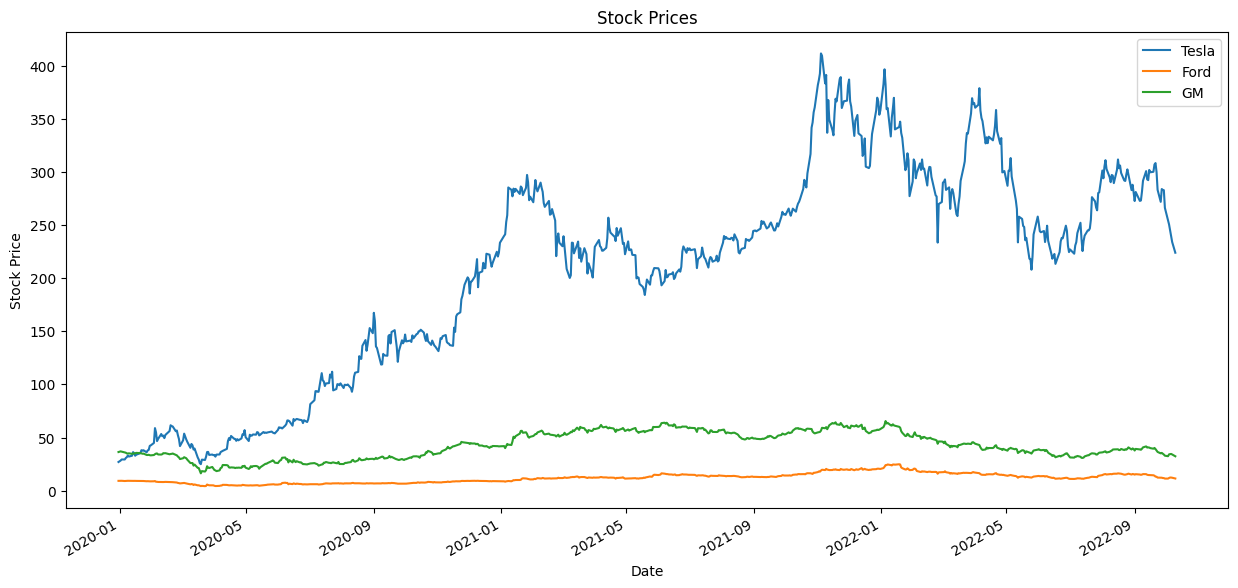

In [61]:
tesla['Open'].plot(label = 'Tesla',figsize=(15,7))
ford['Open'].plot(label = 'Ford')
gm['Open'].plot(label = 'GM')
plt.legend()
plt.title('Stock Prices')
plt.ylabel('Stock Price')
plt.show()

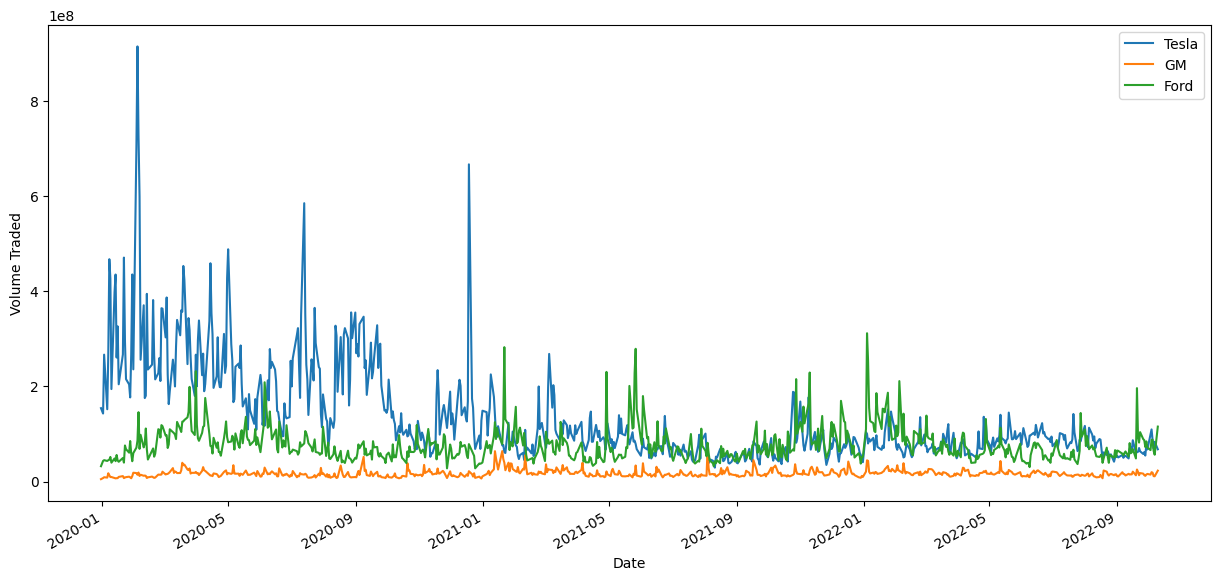

In [62]:
tesla ['Volume'].plot(label='Tesla', figsize = (15,7))
gm ['Volume'].plot(label='GM')
ford ['Volume'].plot(label='Ford')
plt.ylabel('Volume Traded')
plt.legend()

In [63]:
ford.iloc[[ford['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-04,24.559999,22.42,22.52,24.309999,311645200.0,23.788546


<AxesSubplot: xlabel='Date'>

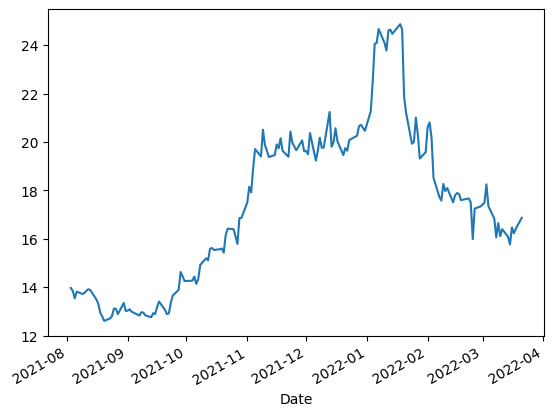

In [64]:
ford.iloc[400:560]['Open'].plot()

In [65]:
tesla['Total Traded'] = tesla ['Open'] * tesla ['Volume']
gm['Total Traded'] = gm ['Open'] * gm ['Volume']
ford['Total Traded'] = ford ['Open'] * ford ['Volume']

In [66]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-12-31,28.086000,26.805332,27.000000,27.888666,154285500.0,27.888666,4.165708e+09
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000,4.046376e+09
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000,7.831429e+09
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667,4.463283e+09
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666,8.250801e+09


In [67]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-12-31,36.740002,36.320000,36.369999,36.599998,5160200.0,36.076527,1.876765e+08
2020-01-02,37.380001,36.549999,37.000000,37.380001,7454400.0,36.845375,2.758128e+08
2020-01-03,36.919998,36.110001,36.730000,36.320000,9173000.0,35.800533,3.369243e+08
2020-01-06,36.180000,35.799999,35.950001,35.840000,8408200.0,35.327400,3.022748e+08
2020-01-07,35.840000,34.740002,35.750000,35.150002,17556800.0,34.647270,6.276556e+08


In [68]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-12-31,9.33,9.25,9.25,9.30,32342100.0,8.903500,2.991644e+08
2020-01-02,9.42,9.19,9.29,9.42,43425700.0,9.018384,4.034248e+08
2020-01-03,9.37,9.15,9.31,9.21,45040800.0,8.817337,4.193299e+08
2020-01-06,9.17,9.06,9.10,9.16,43372300.0,8.769468,3.946879e+08
2020-01-07,9.25,9.12,9.20,9.25,44984100.0,8.855632,4.138537e+08


Text(0, 0.5, 'Total Traded')

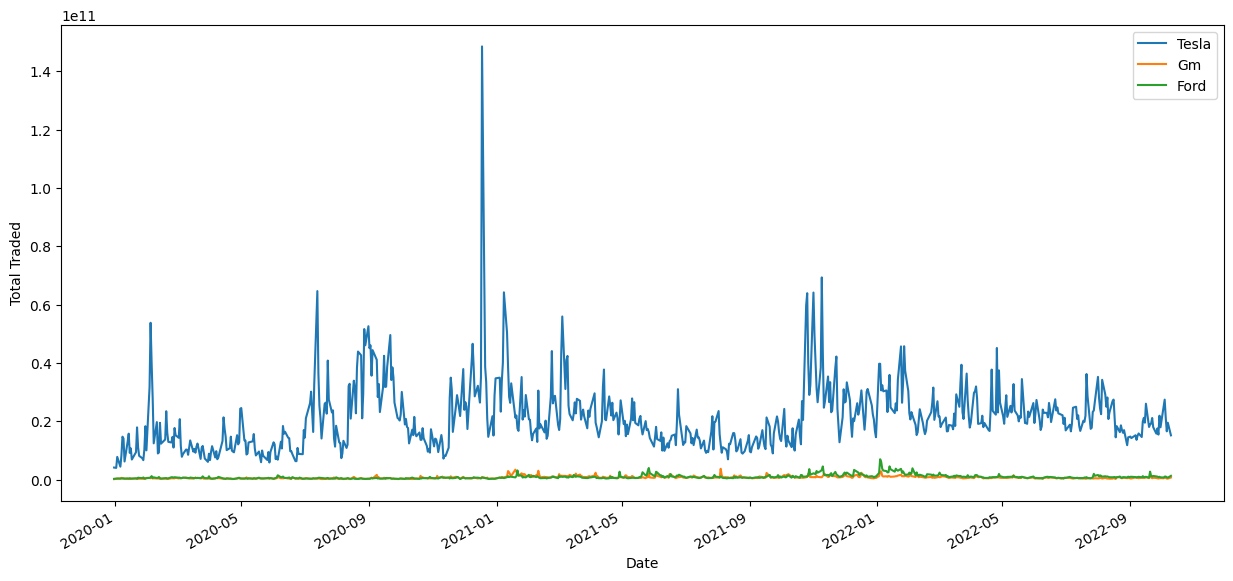

In [69]:
tesla['Total Traded'].plot(label='Tesla', figsize=(15,7))
gm['Total Traded'].plot(label='Gm')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

In [70]:
tesla['Total Traded'].argmax()

245

In [71]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-12-18,231.666672,209.513336,222.96666,231.666672,666378600.0,231.666672,1.485802e+11


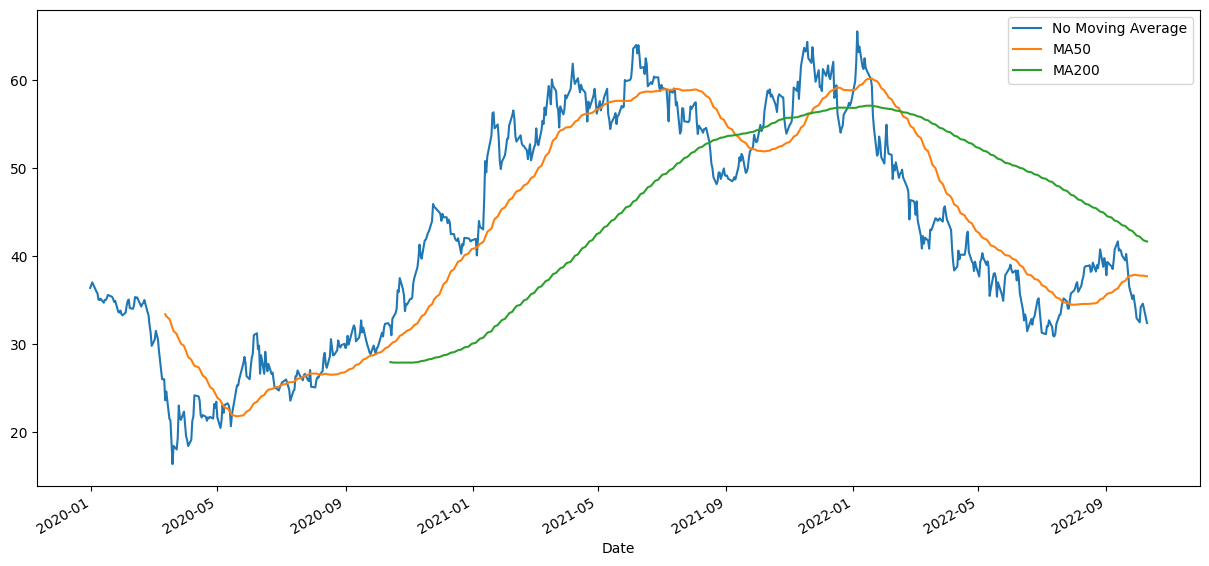

In [72]:
gm['Open'].plot(label ='No Moving Average', figsize=(15,7))
gm['MA50'] = gm ['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200'] = gm ['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend()

In [73]:
from pandas.plotting import scatter_matrix
import pandas as pd


In [77]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis = 1)
car_comp.columns = ['Tesla Open', 'GM Open','Ford Open']

array([[<AxesSubplot: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

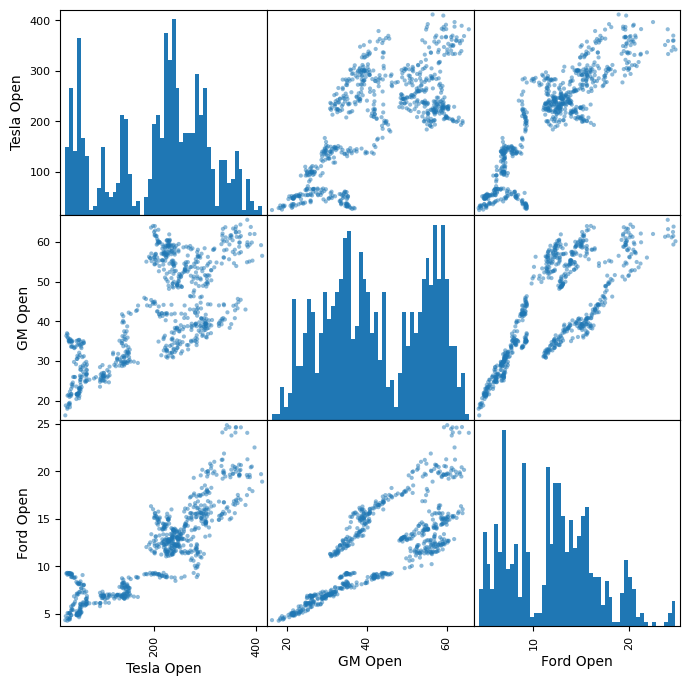

In [78]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins' :50})

([<matplotlib.lines.Line2D at 0x265fceaeb60>,
  <matplotlib.patches.Rectangle at 0x265fd6bafb0>])

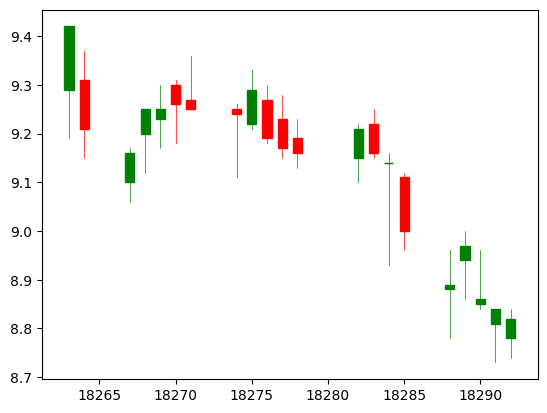

In [90]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

ford_reset = ford.loc ['2020-01':'2020-01'].reset_index()

ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]

monday = WeekdayLocator(MONDAY)
alldays = DayLocator
weekFormatter = DateFormatter ('%b %d')
dayFormatter = DateFormatter ('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, ford_values,width = 0.6, colorup='g', colordown='r')

In [93]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
gm['returns'] = (gm['Close']/gm['Close'].shift(1)) - 1

In [92]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2019-12-31,28.086000,26.805332,27.000000,27.888666,154285500.0,27.888666,4.165708e+09,NaN
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000,4.046376e+09,0.028518
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000,7.831429e+09,0.029633
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667,4.463283e+09,0.019255
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666,8.250801e+09,0.038801


In [94]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2019-12-31,9.33,9.25,9.25,9.30,32342100.0,8.903500,2.991644e+08,NaN
2020-01-02,9.42,9.19,9.29,9.42,43425700.0,9.018384,4.034248e+08,0.012903
2020-01-03,9.37,9.15,9.31,9.21,45040800.0,8.817337,4.193299e+08,-0.022293
2020-01-06,9.17,9.06,9.10,9.16,43372300.0,8.769468,3.946879e+08,-0.005429
2020-01-07,9.25,9.12,9.20,9.25,44984100.0,8.855632,4.138537e+08,0.009825


In [95]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2019-12-31,36.740002,36.320000,36.369999,36.599998,5160200.0,36.076527,1.876765e+08,NaN,NaN,NaN
2020-01-02,37.380001,36.549999,37.000000,37.380001,7454400.0,36.845375,2.758128e+08,NaN,NaN,0.021312
2020-01-03,36.919998,36.110001,36.730000,36.320000,9173000.0,35.800533,3.369243e+08,NaN,NaN,-0.028357
2020-01-06,36.180000,35.799999,35.950001,35.840000,8408200.0,35.327400,3.022748e+08,NaN,NaN,-0.013216
2020-01-07,35.840000,34.740002,35.750000,35.150002,17556800.0,34.647270,6.276556e+08,NaN,NaN,-0.019252


<AxesSubplot: >

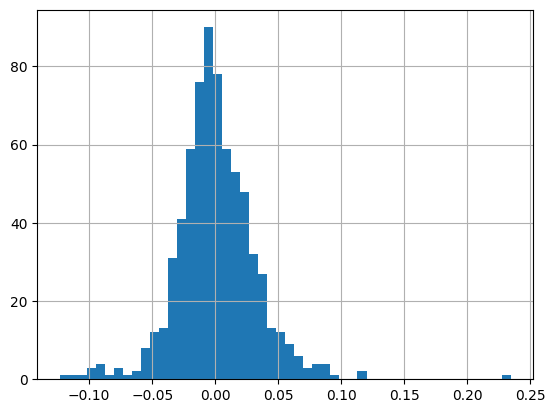

In [97]:
ford['returns'].hist(bins=50)

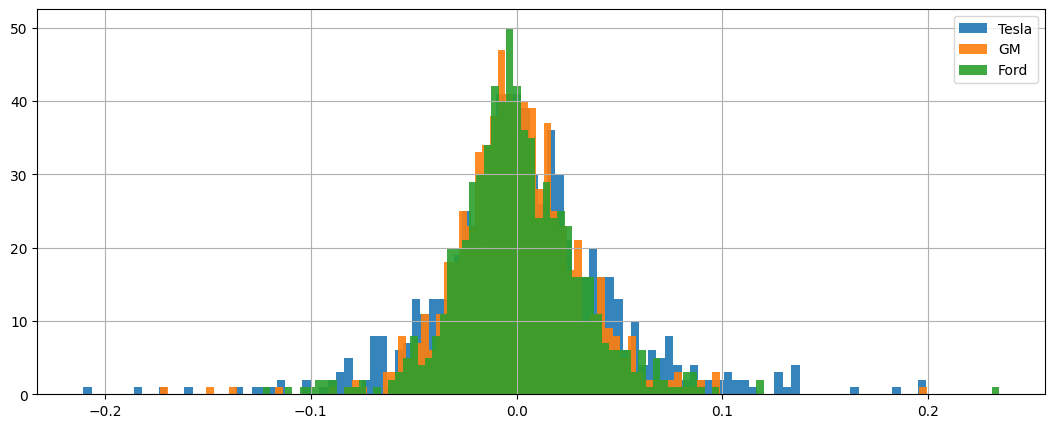

In [112]:
tesla['returns'].hist(bins=100, label='Tesla', alpha=0.9 ,figsize = (13,5))
gm['returns'].hist(bins=100, label='GM', alpha=0.9)
ford['returns'].hist(bins=100, label='Ford', alpha=0.9)
plt.legend()

<AxesSubplot: >

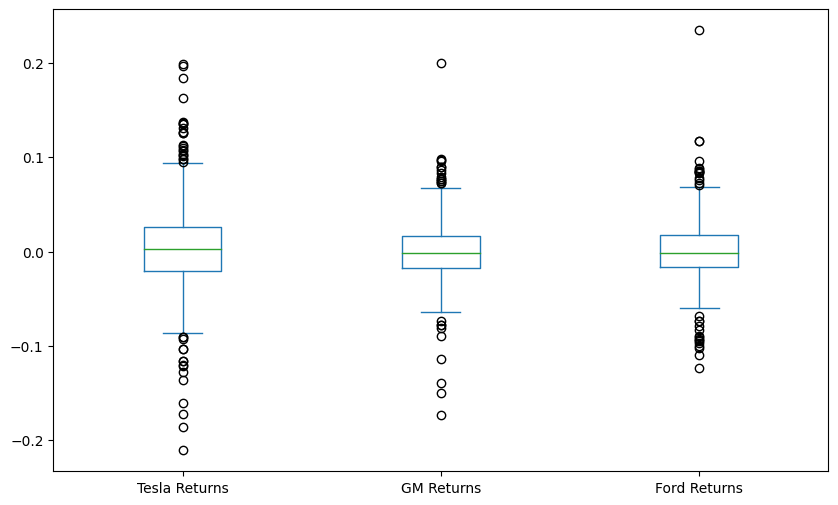

In [120]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis = 1)
box_df.columns=['Tesla Returns', 'GM Returns','Ford Returns']
box_df.plot(kind='box',figsize = (10,6))

array([[<AxesSubplot: xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Tesla Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot: xlabel='Tesla Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='GM Returns'>],
       [<AxesSubplot: xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Ford Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

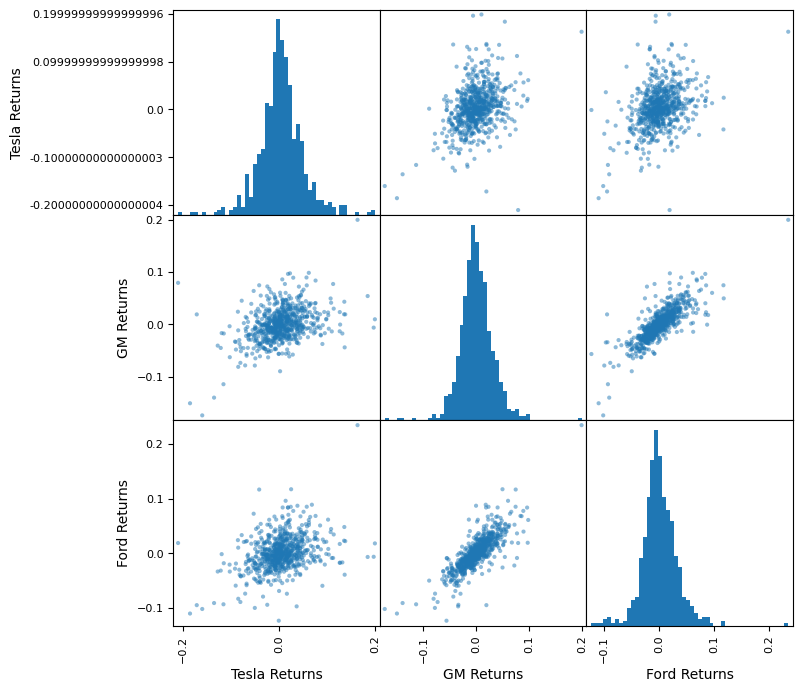

In [124]:
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50})